In [75]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
import os
from pathlib import Path
import json
import collections

In [76]:
# Specify the parent folder paths in a list
folders = [
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-52000',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-52000',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-59000/inference/0',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-54500/inference/0',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-113500/inference/0',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-84500/inference/07-13-11:23',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-145500/inference/07-13-11:25'

    ]

fig_save_path = "./models/sentiment_c4/figures"

In [77]:
def filter_path(path, keywords):
    parts = path.split(os.sep)
    filtered_parts = []
    for part in parts:
        if any(keyword in part for keyword in keywords):
            filtered_parts.append(part)
        if len(filtered_parts) == len(keywords):
            break
    return os.sep.join(filtered_parts)

# Define a function to find and extract the score from a score.txt file
def get_scores(folders, filename):
    scores = {}
    for folder_path in folders:
        # Search for score.txt files in the folder and its subdirectories
        score_files = glob.glob(f'{folder_path}/**/{filename}', recursive=True)

        # If no score file is found, raise an exception
        if not score_files:
            raise FileNotFoundError(f'No score.txt file found in {folder_path} or its subdirectories.')

        # If more than one score file is found, raise an exception
        if len(score_files) > 1:
            raise ValueError(f'More than one score.txt file found in {folder_path} or its subdirectories.')

        # Read the score from the score file
        with open(score_files[0], 'r') as file:
            score = float(file.read().strip())  # Change to int if the score is an integer
        score_key = filter_path(folder_path, keywords=["dataset", "checkpoint"])
        scores[score_key] = score
    return scores

# Define a function to find and extract the score from a score.txt file
def get_scores_json(folders, filename, key=None):
    scores = {}
    for folder_path in folders:
        # Search for score.txt files in the folder and its subdirectories
        score_files = glob.glob(f'{folder_path}/**/{filename}', recursive=True)

        # If no score file is found, raise an exception
        if not score_files:
            raise FileNotFoundError(f'No score.txt file found in {folder_path} or its subdirectories.')

        # If more than one score file is found, raise an exception
        if len(score_files) > 1:
            raise ValueError(f'More than one score.txt file found in {folder_path} or its subdirectories.')

        # Read the score from the score file
        with open(score_files[0], 'r') as file:
            score = json.load(file)
        if key is not None:
            score = score[key]
        score_key = filter_path(folder_path, keywords=["dataset", "checkpoint"])
        scores[score_key] = score
    return scores

def filter_path(path, keywords):
    parts = path.split(os.sep)
    filtered_parts = []
    for part in parts:
        if any(keyword in part for keyword in keywords):
            filtered_parts.append(part)
        if len(filtered_parts) == len(keywords):
            break
    return os.sep.join(filtered_parts)

def plot_scores(scores_dict, title, reverse=False):
    # Get unique labels
    labels = {path: filter_path(path, keywords=["dataset", "checkpoint"]) for path in scores_dict.keys()}
    unique_labels = list(set(labels.values()))

    # Create a color map
    color_map = plt.colormaps.get_cmap('tab10')  # Choose the color map you like
    colors = color_map(np.linspace(0, 1, len(unique_labels)))

    # Create a dictionary mapping labels to colors
    label_color_dict = {label: color for label, color in zip(unique_labels, colors)}

    # Sort labels and scores in decreasing order by scores
    items = sorted([(label, scores_dict[path]) for path, label in labels.items()], key=lambda x: x[1], reverse=reverse)
    labels, scores = zip(*items)

    # Plot the bars with colors according to their labels
    for i, score in enumerate(scores):
        plt.bar(i, score, color=label_color_dict[labels[i]])

    plt.ylabel('Average Score')
    plt.title(title)

    # Create custom legend
    patches = [mpatches.Patch(color=color, label=label) for label, color in label_color_dict.items()]
    plt.legend(handles=patches)

    plt.xticks([])  # Remove x-axis labels
    # ylims = min(scores) - (min(scores) * 0.025), max(scores) + (max(scores) * 0.025)
    plt.ylim(min(scores) - 0.2, max(scores) + 0.2)  # Add some margin at the top and bottom
    plt.tight_layout()  # Adjust layout so labels aren't cut off
    plt.show()


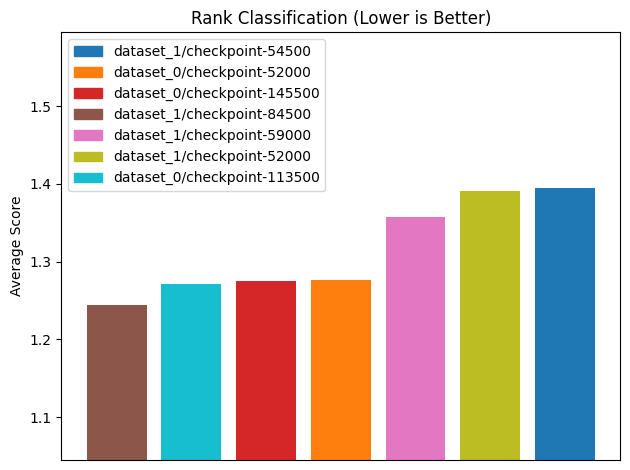

In [78]:
filename_txt = 'ranks.txt'
scores_dict = get_scores(folders, filename_txt)
title = 'Rank Classification (Lower is Better)'
plot_scores(scores_dict, title)

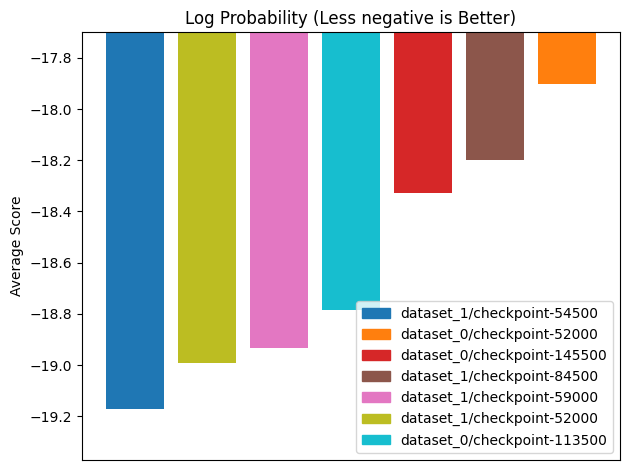

In [79]:
filename_logprob = 'log_probs.txt'
scores_dict = get_scores(folders, filename_logprob)
title = 'Log Probability (Less negative is Better)'
plot_scores(scores_dict, title)

In [80]:
file_paths = [
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_1/10-07-23_15:25/eval/checkpoint-84500/inference/07-13-12:27',
    '/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/sentiment_c4/P_1_PQA_5_promptsource_True/dataset_0/10-07-23_15:26/save_for_later/checkpoint-145500/inference/07-13-12:37',
]

rank_dict = get_scores_json(file_paths, 'rank.json')
logprob_dict = get_scores_json(file_paths, 'log_probs.json')


In [81]:
title = 'Log Probability (Less negative is Better)'
plot_scores(logprob_dict, title)

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [20]:
for key, value in rank_dict.items():
    print(key)
    for key, value in value.items():
        print(key, value)

dataset_1/checkpoint-84500
mean 1.258578431372549
std 0.5473196172771108
samples [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 2, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 

0.8215514597605958


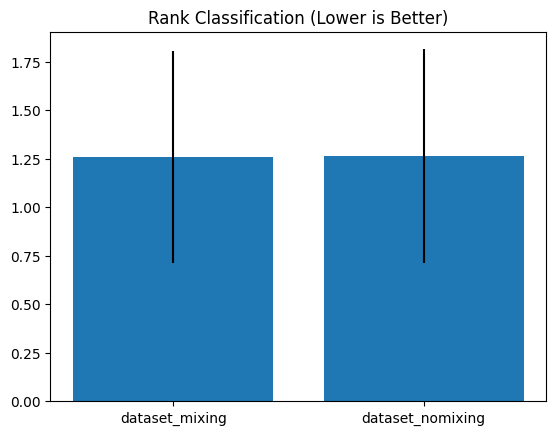

In [71]:
from scipy.stats import ttest_ind_from_stats

def get_significance(mean_diff, std1, std2, n1, n2):
    # Calculating the means
    mean1 = 0  # assuming mean of first sample is 0
    mean2 = mean_diff  # mean of second sample is difference in mean
  
    # Perform t-test
    t_stat, p_value = ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=n1, 
                                           mean2=mean2, std2=std2, nobs2=n2)

    return p_value

import pandas as pd

mean1 = rank_dict['dataset_1/checkpoint-84500']['mean']
mean2 = rank_dict['dataset_0/checkpoint-145500']['mean']
std1 = rank_dict['dataset_1/checkpoint-84500']['std']
std2 = rank_dict['dataset_0/checkpoint-145500']['std']
n1 = rank_dict['dataset_1/checkpoint-84500']['n']
n2 = rank_dict['dataset_0/checkpoint-145500']['n']

p_value = get_significance(mean2 - mean1, std1, std2, n1, n2)
print(p_value)

means = [rank_dict['dataset_1/checkpoint-84500']['mean'], rank_dict['dataset_0/checkpoint-145500']['mean']]
stds = [rank_dict['dataset_1/checkpoint-84500']['std'], rank_dict['dataset_0/checkpoint-145500']['std']]
plt.bar(['dataset_mixing', 'dataset_nomixing'], means, yerr=stds)
plt.title('Rank Classification (Lower is Better)')
plt.savefig(os.path.join(fig_save_path, 'rank.png'))

In [24]:
pd.DataFrame(rank_dict).T

,mean,std,samples,n
dataset_1/checkpoint-84500,1.258578,0.54732,"[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, ...",816
dataset_0/checkpoint-145500,1.264706,0.549982,"[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, ...",816


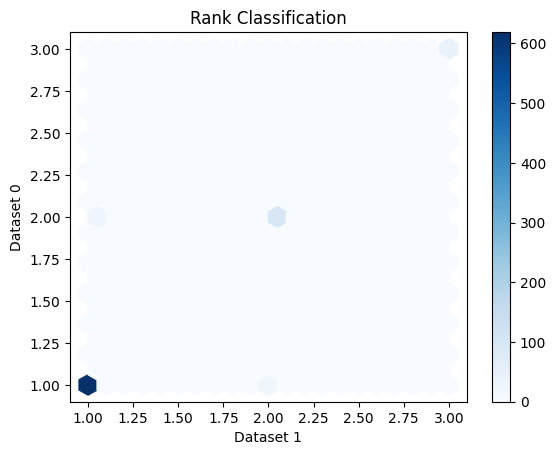

In [72]:
samples1 = rank_dict['dataset_1/checkpoint-84500']['samples']
samples2 = rank_dict['dataset_0/checkpoint-145500']['samples']

hexplot = plt.hexbin(samples1, samples2, gridsize=20, cmap='Blues')
plt.xlabel('Dataset 1')
plt.ylabel('Dataset 0')
plt.title('Rank Classification')
plt.colorbar(hexplot)
plt.savefig(os.path.join(fig_save_path, 'rank_hexbin.png'))

In [31]:
generated_samples = get_scores_json(file_paths, 'generated_samples.json')

In [56]:
generated_samples['dataset_1/checkpoint-84500']

metrics = ['bleu_score']
results = collections.defaultdict(dict)
for dataset, samples in generated_samples.items():
    for sample in samples:
        for metric, result in sample.items():
            if metric in metrics:
                if isinstance(result, dict):
                    for key, value in result.items():
                        if key == 'precisions':
                            value = value[0]
                        if key not in results[dataset]:
                            results[dataset][key] = []                    
                        results[dataset][key].append(value)

In [57]:
import pandas as pd

def nested_dict_to_dataframe(nested_dict):
    df = pd.concat({k: pd.DataFrame(v) for k, v in nested_dict.items()}, axis=0)
    return df

df = nested_dict_to_dataframe(results)


In [59]:
df.reset_index(inplace=True)

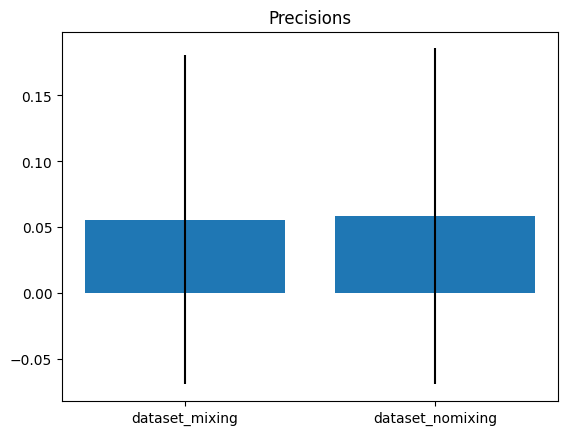

In [73]:
ds_1 = df[df['level_0'] == 'dataset_1/checkpoint-84500']
ds_0 = df[df['level_0'] == 'dataset_0/checkpoint-145500']

ds_1_precisions = ds_1['precisions']
ds_0_precisions = ds_0['precisions']

ds1_1_prec_mean = np.mean(ds_1_precisions)
ds1_1_prec_std = np.std(ds_1_precisions)

ds0_1_prec_mean = np.mean(ds_0_precisions)
ds0_1_prec_std = np.std(ds_0_precisions)

plt.title('Precisions')
plt.bar(['dataset_mixing', 'dataset_nomixing'], [ds1_1_prec_mean, ds0_1_prec_mean], yerr=[ds1_1_prec_std, ds0_1_prec_std])
plt.savefig(os.path.join(fig_save_path, 'precisions.png'))

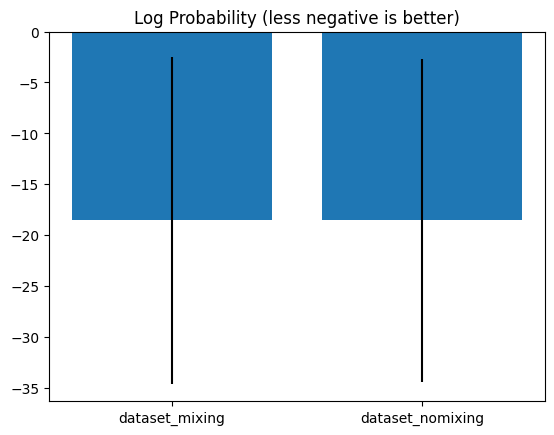

In [85]:
log_probs_mean_1 = logprob_dict['dataset_1/checkpoint-84500']['mean']
log_probs_mean_0 = logprob_dict['dataset_0/checkpoint-145500']['mean']

log_probs_std_1 = logprob_dict['dataset_1/checkpoint-84500']['std']
log_probs_std_0 = logprob_dict['dataset_0/checkpoint-145500']['std']

plt.title('Log Probability (less negative is better)')
plt.bar(['dataset_mixing', 'dataset_nomixing'], [log_probs_mean_1, log_probs_mean_0], yerr=[log_probs_std_1, log_probs_std_0])
plt.savefig(os.path.join(fig_save_path, 'log_probs.png'))